In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
import lime
from lime import lime_tabular

In [50]:
wine = pd.read_csv('winequality-red.csv')

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
print("Unique values in quality:", sorted(wine.quality.unique()))

Unique values in quality: [3, 4, 5, 6, 7, 8]


In [52]:
wine['quality'] = wine['quality'].apply(lambda value: 'low' if value < 5 else 'medium' if value < 7 else 'high')

In [53]:
wine.quality.value_counts()

quality
medium    1319
high       217
low         63
Name: count, dtype: int64

In [54]:
wine[wine.columns[:11]].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [55]:
wine.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [56]:
wine_encoded = wine.copy()
wine_encoded.quality = wine_encoded.quality.apply(lambda q: 2 if q == 'high' else 1 if q == 'medium' else 0)
wine_encoded.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


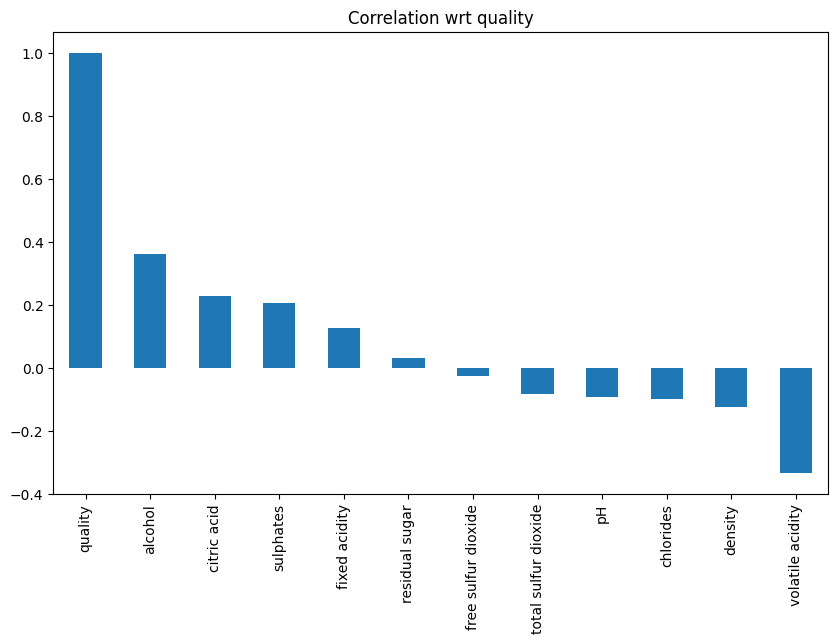

In [57]:
plt.figure(figsize=(10, 6))
wine_encoded.corr()['quality'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation wrt quality')
plt.show()

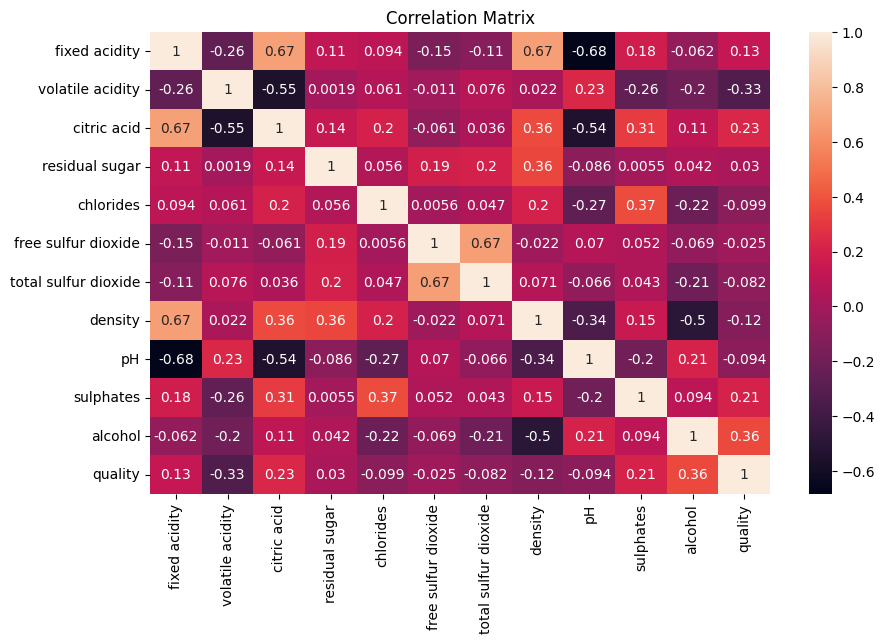

In [58]:
plt.figure(figsize=(10, 6))
sns.heatmap(wine_encoded.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [59]:
X = wine.drop('quality', axis=1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
print(X_train.shape)
print(X_test.shape)

(1279, 11)
(320, 11)


In [61]:
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'gini')
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.77      0.65      0.71        37
         low       0.33      0.07      0.11        15
      medium       0.91      0.97      0.94       268

    accuracy                           0.89       320
   macro avg       0.67      0.56      0.58       320
weighted avg       0.86      0.89      0.87       320



In [63]:
print(confusion_matrix(y_test, y_pred))

[[ 24   0  13]
 [  0   1  14]
 [  7   2 259]]


In [64]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.246795,-1.903182,0.754914,-0.665363,-0.627470,0.197173,-0.504948,-1.445544,-0.120085,0.173186,0.722359
1,-1.467996,2.760414,1.993243,-0.376436,-0.991156,-0.089998,1.223380,-1.673796,2.274683,-0.348001,1.003553
2,-1.177234,2.817287,-1.412161,-0.376436,-0.102145,0.101449,-0.683741,-1.249140,1.821619,-0.637549,0.722359
3,-0.770167,0.542362,-0.999385,-0.520899,-0.243579,-0.760063,-0.683741,0.571571,1.109661,-0.753368,-1.339736
4,-0.712015,-0.026369,-1.257370,0.056955,-0.243579,0.484343,1.342575,0.385784,1.239108,-0.348001,-0.589884


In [65]:
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.770167,-0.538227,0.135750,-0.376436,-0.061736,-0.951510,-0.236759,-1.732186,0.138809,-1.158736,1.378480
1,3.300501,-0.651973,1.838452,0.923737,0.019083,-0.951510,0.001631,2.482522,-1.932342,0.868101,0.347432
2,2.951587,-1.448197,1.786855,0.056955,-0.122350,-0.951510,-0.773137,1.845539,-0.961490,0.057366,-0.683615
3,-0.072338,0.997347,-0.225429,-0.376436,0.221131,-0.185722,1.014789,0.306161,-0.767320,0.231095,-0.964810
4,-0.653862,-1.561943,0.496929,-0.015277,-0.506241,-0.472892,-0.177162,-1.238524,1.368555,0.810191,1.847137


In [66]:
# explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values, class_names=['low', 'medium', 'high'], discretize_continuous=True, mode='classification')
explainer = lime_tabular.LimeTabularExplainer(X_train.values, class_names=['low', 'medium', 'high'])

In [39]:
i = np.random.randint(0, X_test.shape[0])

exp = explainer.explain_instance(X_test.values[i], rfc.predict_proba, num_features=5)
exp.show_in_notebook()

In [67]:
features_label = wine.columns[:11]
importance = rfc.feature_importances_
indices = np.argsort(importance)
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importance[indices[i]]))

 1) fixed acidity                  0.060892
 2) volatile acidity               0.066550
 3) citric acid                    0.074610
 4) residual sugar                 0.076734
 5) chlorides                      0.080768
 6) free sulfur dioxide            0.089230
 7) total sulfur dioxide           0.092655
 8) density                        0.094481
 9) pH                             0.109310
10) sulphates                      0.120002
11) alcohol                        0.134769


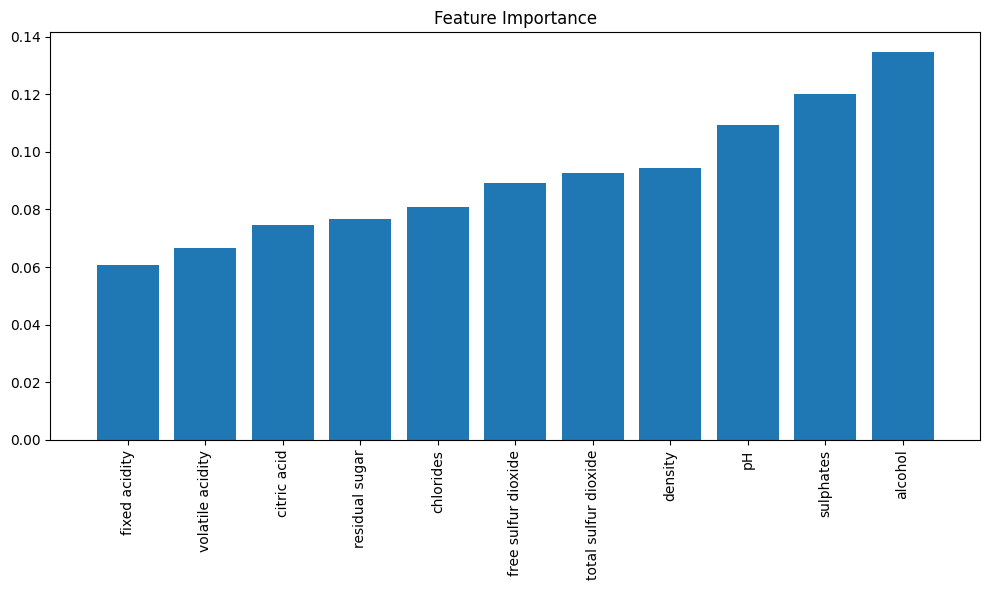

In [68]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importance[indices], align='center')
plt.xticks(range(X.shape[1]), features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [69]:
pca = PCA(n_components = 4)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [70]:
explained_variance = pca.explained_variance_ratio_

print(pd.DataFrame(explained_variance))

          0
0  0.282795
1  0.174531
2  0.144488
3  0.111410


In [71]:
rfc_pca = RandomForestClassifier(n_estimators = 100, criterion = 'gini')

rfc_pca.fit(X_train_pca, y_train)

RandomForestClassifier()

In [73]:
y_pred = rfc_pca.predict(X_test_pca)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.76      0.51      0.61        37
         low       0.00      0.00      0.00        15
      medium       0.89      0.97      0.93       268

    accuracy                           0.87       320
   macro avg       0.55      0.49      0.51       320
weighted avg       0.83      0.87      0.85       320



In [75]:
print(confusion_matrix(y_test, y_pred))

[[ 19   0  18]
 [  0   0  15]
 [  6   2 260]]


In [105]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)

In [106]:
X_train_tsne = tsne.fit_transform(X_train)

X_test_tsne = tsne.fit_transform(X_test)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1279 samples in 0.014s...
[t-SNE] Computed neighbors for 1279 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1279
[t-SNE] Computed conditional probabilities for sample 1279 / 1279
[t-SNE] Mean sigma: 0.942138
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.559715
[t-SNE] KL divergence after 300 iterations: 1.165575
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 320 samples in 0.001s...
[t-SNE] Computed neighbors for 320 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 320 / 320
[t-SNE] Mean sigma: 1.263583
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.636490
[t-SNE] KL divergence after 300 iterations: 0.498803


In [97]:
rfc_tsne = RandomForestClassifier(n_estimators = 100, criterion = 'gini')

rfc_tsne.fit(X_train_tsne, y_train)

RandomForestClassifier()

In [98]:
y_pred = rfc_tsne.predict(X_test_tsne)

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        37
         low       0.00      0.00      0.00        15
      medium       0.84      0.99      0.91       268

    accuracy                           0.83       320
   macro avg       0.28      0.33      0.30       320
weighted avg       0.70      0.83      0.76       320



In [100]:
print(confusion_matrix(y_test, y_pred))

[[  0   0  37]
 [  0   0  15]
 [  3   0 265]]
